# 6.3 Geographic Visualization 

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 1. Import data and libraries

In [31]:
get_ipython().system('pip install folium')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [32]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [44]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\siram\OneDrive\Desktop\scripts ejercico 6\countries.json'

In [46]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\siram\OneDrive\Desktop\scripts ejercico 6\countries.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  


In [47]:
path = r'C:\Users\siram\OneDrive\Desktop\data uefa'

In [48]:
# Import the recipes data

df = pd.read_csv(os.path.join(path, 'key_stats.csv'))

In [49]:
df.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,country
0,Martínez,Ajax,Defender,720,8,0,1,83.3,Netherlands
1,Gravenberch,Ajax,Midfielder,703,8,0,1,89.1,Netherlands
2,Haller,Ajax,Forward,668,8,11,1,82.2,Netherlands
3,Mazraoui,Ajax,Defender,661,8,0,2,81.5,Netherlands
4,Tadić,Ajax,Forward,630,7,2,2,78.9,Netherlands


In [50]:
df.shape

(747, 9)

### 2. Data wrangling 

##### Fix dummy columns

In [177]:
# Select only the necessary columns and put them in a list called columns

columns = ['country','goals', 'assists','minutes_played','match_played','distance_covered']

In [178]:
# Create a subset

country_rec = df[columns]

In [179]:
country_rec.head()

,country,goals,assists,minutes_played,match_played,distance_covered
0,Netherlands,0,1,720,8,83.3
1,Netherlands,0,1,703,8,89.1
2,Netherlands,11,1,668,8,82.2
3,Netherlands,0,2,661,8,81.5
4,Netherlands,2,2,630,7,78.9


In [180]:
# Select only the countries from country_rec in a new subset

country_num = country_rec[['goals','assists','minutes_played','match_played']]

In [181]:
type(s2)

pandas.core.series.Series

In [182]:
country_rec.columns

Index(['country', 'goals', 'assists', 'minutes_played', 'match_played',
       'distance_covered'],
      dtype='object')

In [183]:
country_rec.head()

,country,goals,assists,minutes_played,match_played,distance_covered
0,Netherlands,0,1,720,8,83.3
1,Netherlands,0,1,703,8,89.1
2,Netherlands,11,1,668,8,82.2
3,Netherlands,0,2,661,8,81.5
4,Netherlands,2,2,630,7,78.9


In [187]:
# Select only the countries from country_rec in a new subset

country_num = country_rec[["distance_covered"]]

In [ ]:
# This command turns the dummy data from the states columns into a categorical variable in s2, which is a pandas Series data structure

s2 = country_num.idxmax(axis=1)

# You have not encountered Series yet, but it is another pandas data structure. It is similar to a dataframe, but it is 
# one-dimensional - this means it can only have one column, whereas a dataframe is two dimensional. You can turn any dataframe
# column into series and you can add series to a dataframe as a column!

In [189]:
type(country_rec)

pandas.core.frame.DataFrame

In [190]:
# Create new column 'country' in the country_rec dataframe

country_rec['COUNTRY_NAME'] = s2

C:\Users\siram\AppData\Local\Temp/ipykernel_21688/3172991588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_rec['COUNTRY_NAME'] = s2


In [191]:
country_rec.columns

Index(['country', 'goals', 'assists', 'minutes_played', 'match_played',
       'distance_covered', 'COUNTRY_NAME'],
      dtype='object')

In [192]:
country_rec.columns

Index(['country', 'goals', 'assists', 'minutes_played', 'match_played',
       'distance_covered', 'COUNTRY_NAME'],
      dtype='object')

In [193]:
country_rec.head()

,country,goals,assists,minutes_played,match_played,distance_covered,COUNTRY_NAME
0,Netherlands,0,1,720,8,83.3,goals
1,Netherlands,0,1,703,8,89.1,goals
2,Netherlands,11,1,668,8,82.2,goals
3,Netherlands,0,2,661,8,81.5,goals
4,Netherlands,2,2,630,7,78.9,goals


In [194]:
country_rec['COUNTRY_NAME'] = country_rec['COUNTRY_NAME'].str.title()

C:\Users\siram\AppData\Local\Temp/ipykernel_21688/3745771539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_rec['COUNTRY_NAME'] = country_rec['COUNTRY_NAME'].str.title()


In [195]:
country_rec.head()

,country,goals,assists,minutes_played,match_played,distance_covered,COUNTRY_NAME
0,Netherlands,0,1,720,8,83.3,Goals
1,Netherlands,0,1,703,8,89.1,Goals
2,Netherlands,11,1,668,8,82.2,Goals
3,Netherlands,0,2,661,8,81.5,Goals
4,Netherlands,2,2,630,7,78.9,Goals


### 3. Conduct consistency checks

In [196]:
# Check for missing values

country_rec.isnull().sum()

country             0
goals               0
assists             0
minutes_played      0
match_played        0
distance_covered    0
COUNTRY_NAME        0
dtype: int64

In [199]:
# Impute missing values with median

country_rec['goals'].fillna(country_rec['goals'].median(), inplace=True)
country_rec['assists'].fillna(country_rec['assists'].median(), inplace=True)
country_rec['minutes_played'].fillna(country_rec['minutes_played'].median(), inplace=True)
country_rec['match_played'].fillna(country_rec['match_played'].median(), inplace=True)

In [200]:
# Last check for NaN

country_rec.isnull().sum()

country             0
goals               0
assists             0
minutes_played      0
match_played        0
distance_covered    0
COUNTRY_NAME        0
dtype: int64

##### Duplicates check

In [201]:
dups = country_rec.duplicated()

In [202]:
dups.shape # no dups

(747,)

##### Extreme values checks

<AxesSubplot:xlabel='goals', ylabel='Count'>

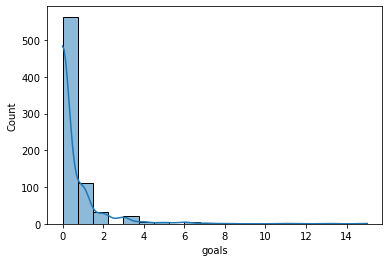

In [203]:
sns.histplot(country_rec['goals'], bins=20, kde = True) # shows extreme values for 'goals'

In [210]:
# Check how many extreme values

country_rec[country_rec['goals'] >3]

,country,goals,assists,minutes_played,match_played,distance_covered,COUNTRY_NAME
2,Netherlands,11,1,668,8,82.2,Goals
48,Spain,4,2,518,9,64.3,Goals
85,Germany,13,3,876,10,99.7,Goals
87,Germany,6,6,798,10,94,Goals
88,Germany,4,3,778,10,98.5,Goals
142,portugal,6,0,613,10,72.4,Goals
176,England,4,2,246,5,29.8,Goals
300,germany,7,0,531,6,62.8,Goals
324,England,8,2,1008,13,112,Goals
327,England,5,1,822,13,100.3,Goals


In [213]:
# Clean extreme values

country_rec = country_rec[country_rec['goals'] > 10] 
# 500 was picked because it is beyond belief there could be a meal with over 500 gr of fat!

In [214]:
country_rec.shape

(3, 7)

In [216]:
# Create a 'cal_per_portion' column

country_rec['games_played'] = country_rec['minutes_played']/90

C:\Users\siram\AppData\Local\Temp/ipykernel_21688/749548679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_rec['games_played'] = country_rec['minutes_played']/90


<AxesSubplot:xlabel='games_played', ylabel='Count'>

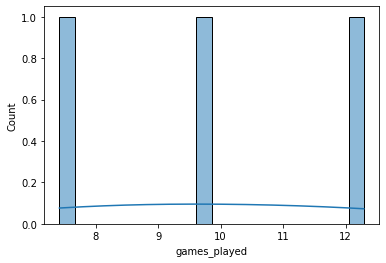

In [217]:
sns.histplot(country_rec['games_played'], bins=20, kde = True)  # shows extreme values for 'cal_per_portion'

In [220]:
# Clean extreme values in 'cal_per_portion'

country_rec = country_rec[country_rec['games_played'] < 7]

<AxesSubplot:>

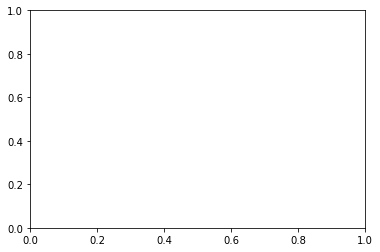

In [223]:
# Check the rating variable

sns.histplot(country_rec['assists'], bins=1, kde = True)

In [225]:
# Select only entries with a non-zero rating
country_rec = country_rec[country_rec['assists'] >= 1]

In [227]:
country_rec.dtypes

country              object
goals                 int64
assists               int64
minutes_played        int64
match_played          int64
distance_covered     object
COUNTRY_NAME         object
games_played        float64
dtype: object

### 4. Plotting a choropleth

In [229]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = country_rec[['country','goals']]
data_to_plot.head()

,country,goals


In [ ]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['country', 'goals'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "goals").add_to(map)
folium.LayerControl().add_to(map)

map

In [232]:
map.save('plot_data.html')